In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

data = pd.read_csv("books.csv", error_bad_lines = False)
print(data.head())
data.rename(columns={'  num_pages':"num_pages"}, inplace=True)
print(data.columns)
# ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
#        'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
#        'publication_date', 'publisher']


#hypothesis - to predict rating OR good book is >=3.5 bad book is <3.5

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng         

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [32]:
'''
Things to try:
scatterplot of num of pages on rating
number of ratings on rating
nuber of reviews on rating
publication date on rating (did "good" books happen more in the "good old days"?)

Also try multiple linear regression model with all these inputs on rating
and determine the ones with the most impact

Try making a decision tree? and see the ranking of the gini impurities?

In scatterplots, see if there are clusters - then use k means clustering (unsupervised)

'''

'\nThings to try:\nscatterplot of num of pages on rating\nnumber of ratings on rating\nnuber of reviews on rating\npublication date on rating (did "good" books happen more in the "good old days"?)\n\nAlso try multiple linear regression model with all these inputs on rating\nand determine the ones with the most impact\n\nTry making a decision tree? and see the ranking of the gini impurities?\n\nIn scatterplots, see if there are clusters - then use k means clustering (unsupervised)\n\n'

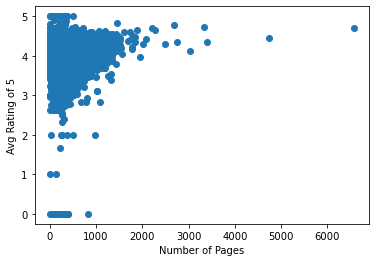

[0.0002187] 3.8605037745743136
r square: 0.02264321108252576


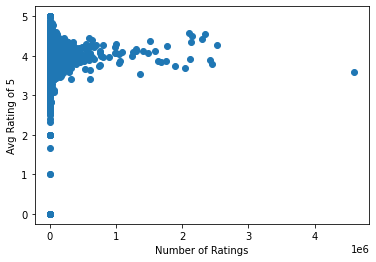

[1.19083629e-07] 3.931938639919615
r square: 0.001461042970934856


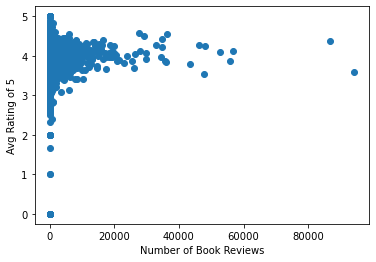

[4.57900873e-06] 3.9315932964102642
r square: 0.0011331930651919953


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     90.12
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.28e-57
Time:                        20:31:06   Log-Likelihood:                -3987.0
No. Observations:               11123   AIC:                             7982.
Df Residuals:                   11119   BIC:                             8011.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8593      0.006    681.435      0.000       3.848       3.870
num_pages              0.0002   1.36e-05     15.928      0.000       0.000       0.000
ratings_count       1.087e-07   5.84e-08      1.862      0.063   -5.72e-09    2.23e-07
text_reviews_count -2.825e-07   2.55e-06     -0.111      0.912   -5.28e-06    4.71e-06
==============================================================================
Omnibus:                     9351.119   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           660720.455
Skew:                          -3.616   Prob(JB):                         0.00
Kurtosis:                      40.059   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13','language_code', 
# '  num_pages', 'ratings_count',
# 'text_reviews_count','publication_date', 'publisher']

# scatterplot of num of pages on rating
x1=data["num_pages"]
y=data["average_rating"]
plt.scatter(x1, y)
plt.xlabel("Number of Pages")
plt.ylabel("Avg Rating of 5")
plt.show()
X=x1.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_, regr.intercept_)
print(f"r square: {regr.score(X,y)}")

# number of ratings on rating
x2=data["ratings_count"]
plt.scatter(x2, y)
plt.xlabel("Number of Ratings")
plt.ylabel("Avg Rating of 5")
plt.show()
X2=x2.values.reshape(-1,1)
regr2 = linear_model.LinearRegression()
regr2.fit(X2,y)
print(regr2.coef_, regr2.intercept_)
print(f"r square: {regr2.score(X2,y)}")


# number of reviews on rating
x3=data["text_reviews_count"]
plt.scatter(x3, y=data["average_rating"])
plt.xlabel("Number of Book Reviews")
plt.ylabel("Avg Rating of 5")
plt.show()
X3=x3.values.reshape(-1,1)
regr3 = linear_model.LinearRegression()
regr3.fit(X3,y)
print(regr3.coef_, regr3.intercept_)
print(f"r square: {regr3.score(X3,y)}")


resultsPages = sm.OLS.from_formula("average_rating ~ num_pages + ratings_count + text_reviews_count", data=data).fit()
resultsPages.summary()


In [34]:
'''
# doing log transformation to get more linear plots
# log_commute_times = np.log(commute_times)

#['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13','language_code', 
# '  num_pages', 'ratings_count',
# 'text_reviews_count','publication_date', 'publisher']

# np.log on independent
# scatterplot of num of pages on rating
x1=np.log(data["num_pages"])
y=data["average_rating"]
plt.scatter(x1, y)
plt.xlabel("Number of Pages")
plt.ylabel("Avg Rating of 5")
plt.show()
X=x1.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_, regr.intercept_)
print(f"r square: {regr.score(X,y)}")

# number of ratings on rating
x2=np.log(data["ratings_count"])
plt.scatter(x2, y)
plt.xlabel("Number of Ratings")
plt.ylabel("Avg Rating of 5")
plt.show()
X2=x2.values.reshape(-1,1)
regr2 = linear_model.LinearRegression()
regr2.fit(X2,y)
print(regr2.coef_, regr2.intercept_)
print(f"r square: {regr2.score(X2,y)}")

# number of reviews on rating
plt.scatter(x=np.log(data["text_reviews_count"]), y=data["average_rating"])
plt.xlabel("Number of Book Reviews")
plt.ylabel("Avg Rating of 5")
plt.show()
X3=x3.values.reshape(-1,1)
regr3 = linear_model.LinearRegression()
regr3.fit(X3,y)
print(regr3.coef_, regr3.intercept_)
print(f"r square: {regr3.score(X3,y)}")

plt.clf()

# np.log on dependent does not spread out the data as well as log(x)
'''

'\n# doing log transformation to get more linear plots\n# log_commute_times = np.log(commute_times)\n\n#[\'bookID\', \'title\', \'authors\', \'average_rating\', \'isbn\', \'isbn13\',\'language_code\', \n# \'  num_pages\', \'ratings_count\',\n# \'text_reviews_count\',\'publication_date\', \'publisher\']\n\n# np.log on independent\n# scatterplot of num of pages on rating\nx1=np.log(data["num_pages"])\ny=data["average_rating"]\nplt.scatter(x1, y)\nplt.xlabel("Number of Pages")\nplt.ylabel("Avg Rating of 5")\nplt.show()\nX=x1.values.reshape(-1,1)\nregr = linear_model.LinearRegression()\nregr.fit(X,y)\nprint(regr.coef_, regr.intercept_)\nprint(f"r square: {regr.score(X,y)}")\n\n# number of ratings on rating\nx2=np.log(data["ratings_count"])\nplt.scatter(x2, y)\nplt.xlabel("Number of Ratings")\nplt.ylabel("Avg Rating of 5")\nplt.show()\nX2=x2.values.reshape(-1,1)\nregr2 = linear_model.LinearRegression()\nregr2.fit(X2,y)\nprint(regr2.coef_, regr2.intercept_)\nprint(f"r square: {regr2.score(X2

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic regression to see features impact label and classify "good" or "bad" book based on ratings

# create good_or_bad column
data["good_or_bad"] = [1 if rating>=3.5 else 0 for rating in data["average_rating"]]

# split the data into features and label
features = data[["num_pages","text_reviews_count"]]
label = data["good_or_bad"]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

# normalize feature variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# fit the model to training data
model = LogisticRegression()
model.fit(x_train, y_train)

# score the model
print(model.score(x_train, y_train))
# 0.9330186558777254

# score the model used on the test data
print(model.score(x_test, y_test))
# 0.9384269662921348

# find the predicted values to create a confusion matrix
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# num pages, ratings counts, review counts
# 0 true negatives, 0 false negatives, 2082 true positives, 143 false positives
# num pages, ratings counts
# 0 true negatives, 0 false negatives, 2065 true positives, 160 false positives
# num pages
# 0 true negatives, 0 false negatives, 2077 true positives, 148 false positives
# no random state 0 TN, 0 FN, 2085 TP, 140 FP

# accuracy score = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# num pages, ratings counts, review counts
# 0.9357303370786517
# num pages, ratings counts
# 0.9280898876404494
# num pages, reviews_count
# 0.9334831460674158 no random state -> 0.9370786516853933

# f1 score = weighted average of precision and recall
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
# num pages, ratings counts, review counts
# 0.9667982354306943
# num pages, ratings counts
# 0.9627039627039626
# num pages, reviews_count
# 0.9655973965597396 no random state -> 0.9675174013921114

# Being Jamie Baker has 696 reviews, 353 pages, 4.01 rating = GOOD
jamie_pred = model.predict([[353,696]])
print(jamie_pred)

# Wahoo!! I built a predictor for a good book!




0.9344796583501911
0.9325842696629213
[[   0  150]
 [   0 2075]]
0.9325842696629213
0.9651162790697675
[1]
